<a href="https://colab.research.google.com/github/rujhannajib/mlbNittanyAI-rujhan/blob/main/Decision_Tree_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
## Name: Muhammad Rujhan Najib Bin Fauzi Najib
## PSU ID: 950118053
## PSU email: mpf5654@psu.edu
## Project 1: Build a model from scratch

In [67]:
# importing important libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
palette_color = sns.color_palette('bright')

In [68]:
# load the data

df = pd.read_csv("/content/drive/MyDrive/NittanyAI/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
# we are going to drop Id since it has no meaning
df.drop("Id", axis="columns", inplace=True)
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Building Decision Tree from scratch

Inspiration: https://www.kaggle.com/code/fareselmenshawii/decision-tree-from-scratch

Improvements:
- Fixed minor bugs for the tree. For example, some variables are not defined.
- Modify the code so it can accept pandas DataFrame and Series as input, instead of only numpy arrays.

In [70]:
class Node():
  def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
    self.feature = feature # current feature of data (column) for the node
    self.threshold = threshold # threshold for splitting the data, branching out
    self.left = left # left node
    self.right = right # right node
    self.gain = gain
    self.value = value # hold final value for leaf nodes

class DecisionTree():

  def __init__(self, min_samples=2, max_depth=2):
    '''
    min_samples -> minimum number of samples required to split an internal node
    max_depth (int) -> maximum depth of the decision tree
    '''
    self.root = None
    self.min_samples = min_samples
    self.max_depth = max_depth

  def split_data(self, dataset, feature, threshold):
    left_dataset = []
    right_dataset = []
    '''
    left_dataset: subset of data with feature value less than or equal to threshold
    right_dataset: subset of data with feature value greater than threshold
    '''
    for row in dataset:
      if row[feature] <= threshold:
        left_dataset.append(row)
      else:
       right_dataset.append(row)

    # convert into numpy array
    left_dataset = np.array(left_dataset)
    right_dataset = np.array(right_dataset)

    return left_dataset, right_dataset

  def entropy(self, y):
    '''
    Entropy: expected value of suprise
    '''

    entropy = 0

    # get all disticnt target
    labels =  np.unique(y)

    for label in labels:
      # get rows with y == label
      label_row = y[y==label]
      # calculate ratio/probabilty of current label
      p1 = len(label_row) / len(y)
      # calculate the entropy
      entropy += -p1 * np.log2(p1)

    return entropy

  def information_gain(self, parent, left, right):
    '''
    Compute information gain from splitting the parent dataset into two datas
    Information gain: reduction of entropy
    '''
    information_gain = 0
    parent_entropy = self.entropy(parent)
    # calculate weight for left and right nodes
    weight_left = len(left) / len(parent)
    weight_right = len(right) / len(parent)
    # compute entropy for left and right nodes
    entropy_left, entropy_right = self.entropy(left), self.entropy(right)
    # calculate weighted entropy
    weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
    # calculate information gain
    information_gain = parent_entropy - weighted_entropy
    return information_gain

  def best_split(self, dataset, num_samples, num_features):
    '''
    Finds the best split for given dataset
    '''
    # store best split values
    best_split = {
        'gain':-1,
        'feature' : None,
        'threshold' : None
    }

    # Loop over all features
    for feature_index in range(num_features):
      feature_values = dataset[:,feature_index]
      # get unique value
      thresholds = np.unique(feature_values)
      # loop over all value
      for i in thresholds:
        left_dataset, right_dataset = self.split_data(dataset, feature_index, i)
        # make sure they are not empty
        if len(left_dataset) and len(right_dataset):
          y, left_y, right_y = dataset[:-1], left_dataset[:,-1], right_dataset[:,-1]
          # compute information gain based on the y-values
          information_gain = self.information_gain(y, left_y, right_y)
          # update best_split
          if information_gain > best_split["gain"]:
            best_split['feature'] = feature_index
            best_split['threshold'] = i
            best_split['left_dataset'] = left_dataset
            best_split['right_dataset'] = right_dataset
            best_split['gain'] = information_gain

    return best_split

  def calculate_leaf_value(self, y):
    '''
    Calculate the most occuring value in the given list of y values
    '''
    y = list(y)
    most_occuring = max(y, key=y.count)
    return most_occuring

  def build_tree(self, dataset, current_depth = 0):
    '''
    Recursively builds a decision tree from the given dataset
    '''
    # split the dataset into X,y values
    X, y = dataset[:,:-1], dataset[:,-1]
    n_samples, n_features = X.shape
    # keep splitting until stopping conditions are met
    if n_samples >= self.min_samples and current_depth <= self.max_depth:
      # get best split
      best_split = self.best_split(dataset, n_samples, n_features)
      # make sure gain is zero
      if best_split["gain"]:
        # split the left and child node recursively
        left_node = self.build_tree(best_split["left_dataset"], current_depth+1)
        right_node = self.build_tree(best_split["right_dataset"], current_depth+1)
        return Node(best_split["feature"],best_split["threshold"], left_node, right_node, best_split["gain"])
    # compute leaf node value
    leaf_value = self.calculate_leaf_value(y)
    return Node(value=leaf_value)

  def fit(self, X, y):
    if y.ndim == 1:
      y = y.values.reshape(-1,1)
    dataset = np.concatenate((X,y), axis=1)
    self.root = self.build_tree(dataset)

  def predict(self, X):
    '''
    Predict the label for each row in X
    '''
    if isinstance(X, pd.DataFrame):
      X = X.values
    predictions = []
    for x in X:
      prediction = self.make_prediction(x, self.root)
      # Append the result
      predictions.append(prediction)
    np.array(predictions)
    return predictions

  def make_prediction(self, x, node):
    '''
    Traverse the decision tree to predict the target value
    '''
    # if leaf node
    if node.value != None:
      return node.value
    else:
      feature = x[node.feature]
      if feature <= node.threshold:
        return self.make_prediction(x, node.left)
      else:
        return self.make_prediction(x, node.right)

In [71]:
# LabelEncoder From Scratch
class LabelEncoder():
  def __init__(self):
    self.ref = {}

  def fit(self, y):
    classes = np.unique(y)
    for i, c in enumerate(classes):
      self.ref[c] = i
    print(self.ref)

  def transform(self, y):
    y_encoded = []
    for c in y:
      y_encoded.append(self.ref[c])
    return np.array(y_encoded)

  def fit_transform(self, y):
    self.fit(y)
    return self.transform(y)

  def decode(self, y):
    y_decoded = []
    for i in y:
      y_decoded.append(list(self.ref.keys())[list(self.ref.values()).index(i)])
    return np.array(y_decoded)

In [72]:
#Encode the target variable, since they are not numerical

le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])


{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [73]:
# Check if we have balanced data
target_pie = df["Species"].value_counts()
target_pie.index

Index([0, 1, 2], dtype='int64', name='Species')

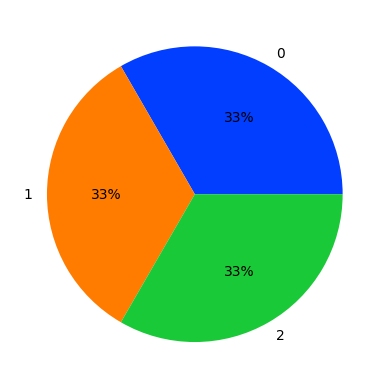

In [74]:
# plotting data on chart
plt.pie(target_pie.values, labels=target_pie.index, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

# Our target variable is balance

In [75]:
# train_test_split from scratch

class train_test_split():
  def __init__(self, X, y, test_size=0.2, random_state=None):
    self.X = X
    self.y = y
    self.test_size = test_size
    self.random_state = random_state

    self.X_train, self.X_test, self.y_train, self.y_test = self.split()

  def shuffle(self):
    if self.random_state:
      np.random.seed(self.random_state)
    indices = np.random.permutation(len(self.X))
    self.X = self.X.iloc[indices]
    self.y = self.y.iloc[indices]

  def split(self):
    self.shuffle()
    split_point = int(len(self.X) * (1 - self.test_size))
    X_train, X_test = self.X[:split_point], self.X[split_point:]
    y_train, y_test = self.y[:split_point], self.y[split_point:]
    return X_train, X_test, y_train, y_test

  def __iter__(self):
    return iter((self.X_train, self.X_test, self.y_train, self.y_test))

In [76]:
# Splitting data into training and test set

X = df.drop(["Species"],axis=1)
X_train, X_test, y_train, y_test  = train_test_split(X, df["Species"], test_size=0.2, random_state=42)

X_train, y_train

(     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 73             6.1           2.8            4.7           1.2
 18             5.7           3.8            1.7           0.3
 118            7.7           2.6            6.9           2.3
 78             6.0           2.9            4.5           1.5
 76             6.8           2.8            4.8           1.4
 ..             ...           ...            ...           ...
 139            6.9           3.1            5.4           2.1
 61             5.9           3.0            4.2           1.5
 147            6.5           3.0            5.2           2.0
 79             5.7           2.6            3.5           1.0
 59             5.2           2.7            3.9           1.4
 
 [120 rows x 4 columns],
 73     1
 18     0
 118    2
 78     1
 76     1
       ..
 139    2
 61     1
 147    2
 79     1
 59     1
 Name: Species, Length: 120, dtype: int64)

In [77]:
# Fit training data
model = DecisionTree()
model.fit(X_train, y_train)

In [78]:
preds = model.predict(X_test)

In [79]:
def accuracy(y_test, y_pred):
  accuracy = np.sum(y_test == y_pred) / len(y_test)
  return accuracy

# Get accuracy
print(f"Accuracy:" , accuracy(y_test, preds)*100)

In [81]:
# Input new flower
SepalLengthCm = 5.1
SepalWidthCm = 3.5
PetalLengthCm = 1.4
PetalWidthCm = 0.2
new_flower = np.array([[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]])
prediction = model.predict(new_flower)
le.decode(prediction)

array(['Iris-setosa'], dtype='<U11')